# Encrypted Tasks

We had the idea of encrypting tasks for the Python course such that the next task can only be read when the previous has been solved. It is one way way of making sure a solution has been found. It may be funny and motivating as well.

## Encrypting and Decrypting Tasks

We could encrypt tasks like this:

In [1]:
import base64
from Crypto.Cipher import AES
from Crypto.Hash import MD5

def pad16(s):
    """Pad the string with spaces until its length is a multiple of 16."""
    l = 16 - len(s) % 16
    if l < 16:
        s = s + ''.join([' '] * l)
    return s

def encrypt_task(key, task):
    """Return an encrypted and base64-coded task."""
    task = pad16(task)
    key_hash = MD5.new(key).hexdigest()
    aes = AES.new(key_hash)
    encrypted_task = aes.encrypt(task)
    return base64.encodestring(encrypted_task)

In [2]:
print encrypt_task('result from previous task', 'This is the new task.')

UuBymBBCLaDQ7OcV/btfkILLTE3nuEF2qSEdtWH1C8I=



Now this is the encrypted task:

**UuBymBBCLaDQ7OcV/btfkILLTE3nuEF2qSEdtWH1C8I=**

Maybe the students could already create the decryption function themselves.

In [3]:
def decrypt_task(key, encrypted_task):
    key_hash = MD5.new(key).hexdigest()
    aes = AES.new(key_hash)
    task = base64.decodestring(encrypted_task)
    return aes.decrypt(task)

In [4]:
print decrypt_task('result from previous task', 'UuBymBBCLaDQ7OcV/btfkILLTE3nuEF2qSEdtWH1C8I=')

This is the new task.           


## Encoded Images

Another way of encoding the next task could be realized through encoded images.

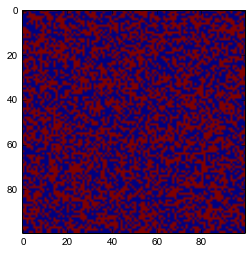

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(np.random.randint(0, 2, size=(100,100)))